In [1]:
# % matplot inline
import numpy as np
import pandas as pd
from sklearn.linear_model import LogisticRegression as LR

In [2]:
data = pd.read_csv(r'/Users/matlida/Downloads/cs-training.csv')
data.head()

,SeriousDlqin2yrs,RevolvingUtilizationOfUnsecuredLines,age,NumberOfTime30-59DaysPastDueNotWorse,DebtRatio,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,NumberOfTime60-89DaysPastDueNotWorse,NumberOfDependents
0,1,0.766127,45,2,0.802982,9120.0,13,0,6,0,2.0
1,0,0.957151,40,0,0.121876,2600.0,4,0,0,0,1.0
2,0,0.658180,38,1,0.085113,3042.0,2,1,0,0,0.0
3,0,0.233810,30,0,0.036050,3300.0,5,0,0,0,0.0
4,0,0.907239,49,1,0.024926,63588.0,7,0,1,0,0.0


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150000 entries, 0 to 149999
Data columns (total 11 columns):
 #   Column                                Non-Null Count   Dtype  
---  ------                                --------------   -----  
 0   SeriousDlqin2yrs                      150000 non-null  int64  
 1   RevolvingUtilizationOfUnsecuredLines  150000 non-null  float64
 2   age                                   150000 non-null  int64  
 3   NumberOfTime30-59DaysPastDueNotWorse  150000 non-null  int64  
 4   DebtRatio                             150000 non-null  float64
 5   MonthlyIncome                         120269 non-null  float64
 6   NumberOfOpenCreditLinesAndLoans       150000 non-null  int64  
 7   NumberOfTimes90DaysLate               150000 non-null  int64  
 8   NumberRealEstateLoansOrLines          150000 non-null  int64  
 9   NumberOfTime60-89DaysPastDueNotWorse  150000 non-null  int64  
 10  NumberOfDependents                    146076 non-null  float64
dtype

In [4]:
data.drop_duplicates(inplace=True)
data.index=range(data.shape[0])
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 149391 entries, 0 to 149390
Data columns (total 11 columns):
 #   Column                                Non-Null Count   Dtype  
---  ------                                --------------   -----  
 0   SeriousDlqin2yrs                      149391 non-null  int64  
 1   RevolvingUtilizationOfUnsecuredLines  149391 non-null  float64
 2   age                                   149391 non-null  int64  
 3   NumberOfTime30-59DaysPastDueNotWorse  149391 non-null  int64  
 4   DebtRatio                             149391 non-null  float64
 5   MonthlyIncome                         120170 non-null  float64
 6   NumberOfOpenCreditLinesAndLoans       149391 non-null  int64  
 7   NumberOfTimes90DaysLate               149391 non-null  int64  
 8   NumberRealEstateLoansOrLines          149391 non-null  int64  
 9   NumberOfTime60-89DaysPastDueNotWorse  149391 non-null  int64  
 10  NumberOfDependents                    145563 non-null  float64
dtype

In [5]:
data.isnull().sum()/data.shape[0]
data.isnull().mean()

SeriousDlqin2yrs                        0.000000
RevolvingUtilizationOfUnsecuredLines    0.000000
age                                     0.000000
NumberOfTime30-59DaysPastDueNotWorse    0.000000
DebtRatio                               0.000000
MonthlyIncome                           0.195601
NumberOfOpenCreditLinesAndLoans         0.000000
NumberOfTimes90DaysLate                 0.000000
NumberRealEstateLoansOrLines            0.000000
NumberOfTime60-89DaysPastDueNotWorse    0.000000
NumberOfDependents                      0.025624
dtype: float64

In [6]:
data["NumberOfDependents"].fillna(data["NumberOfDependents"].mean(),inplace=True)

data.isnull().sum()/data.shape[0]

SeriousDlqin2yrs                        0.000000
RevolvingUtilizationOfUnsecuredLines    0.000000
age                                     0.000000
NumberOfTime30-59DaysPastDueNotWorse    0.000000
DebtRatio                               0.000000
MonthlyIncome                           0.195601
NumberOfOpenCreditLinesAndLoans         0.000000
NumberOfTimes90DaysLate                 0.000000
NumberRealEstateLoansOrLines            0.000000
NumberOfTime60-89DaysPastDueNotWorse    0.000000
NumberOfDependents                      0.000000
dtype: float64

In [7]:
def fill_missing_rf(x,y,to_fill):
    df=x.copy()
    fill=df.loc[:,to_fill]
    df=pd.concat([df.loc[:,df.columns !=to_fill],pd.DataFrame(y)],axis=1)
    #找出训练集和测试集
    ytrain = fill[fill.notnull()]
    ytest = fill[fill.isnull()]
    Xtrain = df.iloc[ytrain.index,:]
    Xtest = df.iloc[ytest.index,:]

    from sklearn.ensemble import RandomForestRegressor as rfr
    rfr = rfr(n_estimators=100)
    rfr = rfr.fit(Xtrain,ytrain)
    ypredict = rfr.predict(Xtest)

    return ypredict

In [8]:
x = data.iloc[:,1:]
y = data["SeriousDlqin2yrs"]
y_pred = fill_missing_rf(x,y,"MonthlyIncome")
# 确认数据无误后晋享覆盖
data.loc[data.loc[:,"MonthlyIncome"].isnull(),"MonthlyIncome"] = y_pred

In [9]:
data.describe([0.01,0.1,0.25,0.5,0.75,0.9,0.99]).T

,count,mean,std,min,1%,10%,25%,50%,75%,90%,99%,max
SeriousDlqin2yrs,149391.0,0.066999,0.250021,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.0
RevolvingUtilizationOfUnsecuredLines,149391.0,6.071087,250.263672,0.0,0.0,0.003199,0.030132,0.154235,0.556494,0.978007,1.093922,50708.0
age,149391.0,52.306237,14.725962,0.0,24.0,33.000000,41.000000,52.000000,63.000000,72.000000,87.000000,109.0
NumberOfTime30-59DaysPastDueNotWorse,149391.0,0.393886,3.852953,0.0,0.0,0.000000,0.000000,0.000000,0.000000,1.000000,4.000000,98.0
DebtRatio,149391.0,354.436740,2041.843455,0.0,0.0,0.034991,0.177441,0.368234,0.875279,1275.000000,4985.100000,329664.0
MonthlyIncome,149391.0,5427.644863,13233.315218,0.0,0.0,0.180000,1800.000000,4430.000000,7416.000000,10800.000000,23250.000000,3008750.0
NumberOfOpenCreditLinesAndLoans,149391.0,8.480892,5.136515,0.0,0.0,3.000000,5.000000,8.000000,11.000000,15.000000,24.000000,58.0
NumberOfTimes90DaysLate,149391.0,0.238120,3.826165,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,3.000000,98.0
NumberRealEstateLoansOrLines,149391.0,1.022391,1.130196,0.0,0.0,0.000000,0.000000,1.000000,2.000000,2.000000,4.000000,54.0
NumberOfTime60-89DaysPastDueNotWorse,149391.0,0.212503,3.810523,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,98.0


In [10]:
data = data[data["age"] != 0]
data = data[data.loc[:,"NumberOfTimes90DaysLate"] < 90]
data.index = range(data.shape[0])

In [11]:
x = data.iloc[:,1:]
y = data.iloc[:,0]
y.value_counts()

n_sample = x.shape[0]
n_1_sampke = y.value_counts()[1]
n_0_sampke = y.value_counts()[0]
print("样本个数{}；1占{:.2%};0占{:.2%}".format(n_sample,n_1_sampke/n_sample,n_0_sampke/n_sample))

样本个数149165；1占6.62%;0占93.38%


In [12]:
# 利用上采样进行平衡样本
import imblearn
from imblearn.over_sampling import SMOTE

from imblearn.over_sampling import ADASYN
sm = SMOTE(random_state=42) #实例化
X,y = sm.fit_sample(x,y)

In [13]:
n_sample_=X.shape[0]
n_1_sampke = pd.Series(y).value_counts()[1]
n_0_sampke = pd.Series(y).value_counts()[0]
print("样本个数{}；1占{:.2%};0占{:.2%}".format(n_sample_,n_1_sampke/n_sample_,n_0_sampke/n_sample_))

样本个数278584；1占50.00%;0占50.00%


In [14]:
from sklearn.model_selection import train_test_split
X = pd.DataFrame(X)
y = pd.DataFrame(y)

X_train,X_vali,Y_train,Y_vali = train_test_split(X,y,test_size = 0.3,random_state = 420)
model_data = pd.concat([Y_train,X_train], axis = 1)
model_data.index = range(model_data.shape[0])
model_data.columns = data.columns

vali_data = pd.concat([Y_vali,X_vali],axis = 1)
vali_data.index = range(vali_data.shape[0])
vali_data.columns = data.columns

model_data.to_csv(r"/Users/matlida/Downloads/mondel.csv")
vali_data.to_csv(r"/Users/matlida/Downloads/vali.csv")

In [15]:
model_data.info()
#vali_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 195008 entries, 0 to 195007
Data columns (total 11 columns):
 #   Column                                Non-Null Count   Dtype  
---  ------                                --------------   -----  
 0   SeriousDlqin2yrs                      195008 non-null  int64  
 1   RevolvingUtilizationOfUnsecuredLines  195008 non-null  float64
 2   age                                   195008 non-null  int64  
 3   NumberOfTime30-59DaysPastDueNotWorse  195008 non-null  int64  
 4   DebtRatio                             195008 non-null  float64
 5   MonthlyIncome                         195008 non-null  float64
 6   NumberOfOpenCreditLinesAndLoans       195008 non-null  int64  
 7   NumberOfTimes90DaysLate               195008 non-null  int64  
 8   NumberRealEstateLoansOrLines          195008 non-null  int64  
 9   NumberOfTime60-89DaysPastDueNotWorse  195008 non-null  int64  
 10  NumberOfDependents                    195008 non-null  float64
dtype

In [16]:

import matplotlib.pyplot as plt 
import scipy

In [17]:
def abab(DF,X,Y,n,q,graph):
    DF = DF[[X,Y]].copy()
    
    DF["qcut"],bins = pd.qcut(DF[X],retbins=True,q=q,duplicates="drop")
    counnt_y0 = DF.loc[DF[Y]==0].groupby(by="qcut").count()[Y]
    counnt_y1 = DF.loc[DF[Y]==1].groupby(by="qcut").count()[Y]
    num_bins = [*zip(bins,bins[1:],counnt_y0,counnt_y1)]
    
    for i in range(q):
        if 0 in num_bins[0][2:]:
            num_bins[0:2]=[(
                num_bins[0][0]
                ,num_bins[1][1]
                ,num_bins[0][2]+num_bins[1][2]
                ,num_bins[0][3]+num_bins[1][3]
                )]
            continue
    
        for i in range(len(num_bins)):
            if 0 in num_bins[i][2:]:
                num_bins[i-1:i+1]=[(
                    num_bins[i-1][0]
                    ,num_bins[i][1]
                    ,num_bins[i-1][2]+num_bins[i][2]
                    ,num_bins[i-1][3]+num_bins[i][3])]
                break       
        else:
            break
    def get_woe(num_bins):
        columns = ["min","max","count_0","count_1"]
        df = pd.DataFrame(num_bins,columns=columns)
    
        df["total"] = df.count_0 + df.count_1
        df["percentage"] = df.total / df.total.sum()
        df["bad_rate"] = df.count_1 / df.total
        df["good%"] = df.count_0 / df.count_0.sum()
        df["bad%"] = df.count_1 / df.count_1.sum()
        df["woe"] = np.log(df["good%"] / df["bad%"]) 
        return df

    def get_iv(df):
        rate = df['good%'] - df['bad%']
        iv = np.sum(rate*df.woe)
        return iv
    IV = []
    axisx = []
    while len(num_bins) > n:
        psv=[]
    #获取num_bins两两之间的卡方值
        for i in range (len(num_bins)-1):
            x1 = num_bins[i][2:]
            x2 = num_bins[i+1][2:]
            pv = scipy.stats.chi2_contingency([x1,x2])[1]
            psv.append(pv)

    # 合并p值最大的两组
        i = psv.index(max(psv))
        num_bins[i:i+2] = [(num_bins[i][0],
                             num_bins[i+1][1],
                             num_bins[i][2]+num_bins[i+1][2],
                            num_bins[i][3]+num_bins[i+1][3]
                        )]        
        bins_df = get_woe(num_bins)
        axisx.append(len(num_bins))
        IV.append(get_iv(bins_df))
        
    if graph:
        plt.figure()
        plt.plot(axisx,IV)
        plt.xticks(axisx)
        plt.grid()
        plt.show()
    return bins_df  

In [18]:
for i in model_data.columns[1:-1]:
    print(i)

RevolvingUtilizationOfUnsecuredLines
age
NumberOfTime30-59DaysPastDueNotWorse
DebtRatio
MonthlyIncome
NumberOfOpenCreditLinesAndLoans
NumberOfTimes90DaysLate
NumberRealEstateLoansOrLines
NumberOfTime60-89DaysPastDueNotWorse


RevolvingUtilizationOfUnsecuredLines


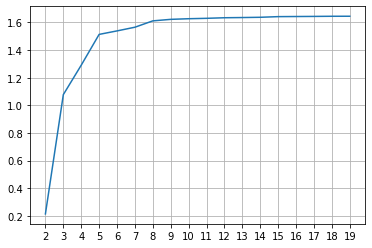

age


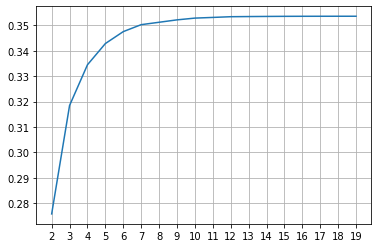

NumberOfTime30-59DaysPastDueNotWorse


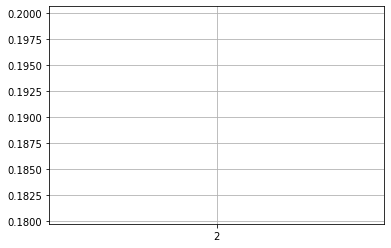

DebtRatio


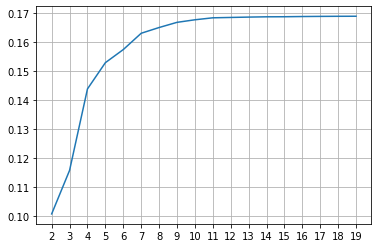

MonthlyIncome


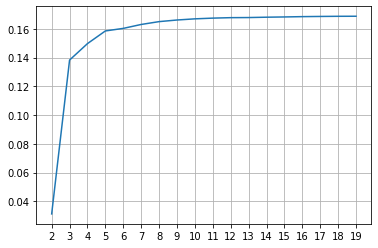

NumberOfOpenCreditLinesAndLoans


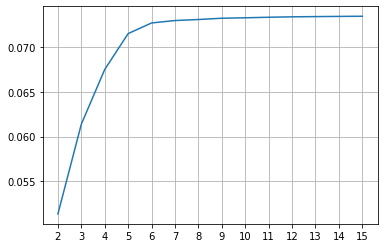

NumberOfTimes90DaysLate


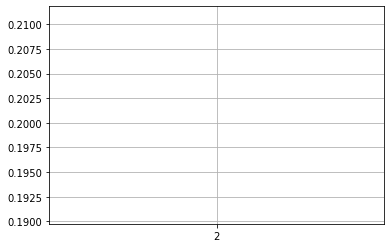

NumberRealEstateLoansOrLines


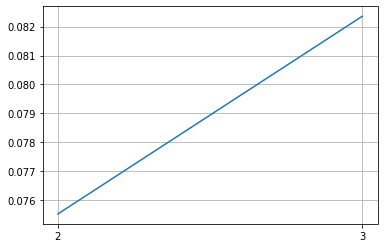

NumberOfTime60-89DaysPastDueNotWorse


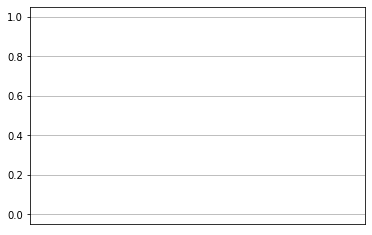

UnboundLocalError: local variable 'bins_df' referenced before assignment

In [19]:
for i in model_data.columns[1:-1]:
    print(i)
    abab (model_data,i,'SeriousDlqin2yrs',n=2,q=20,graph=True)
    #graphforbestbin (DF,X,Y,n=5,q=20,graph=True)

In [ ]:
bins_df_ = abab(model_data,"age",
                   "SeriousDlqin2yrs"
                   ,n=5
                   ,q=20
                   ,graph = False)
bins_df_

In [20]:
auto_col_bins = {'RevolvingUtilizationOfUnsecuredLines':6
                 ,'age':5
                 ,'DebtRatio':4
                 ,'MonthlyIncome':3
                 ,'NumberOfOpenCreditLinesAndLoans':5
                 }

# 对不能使用自动分箱的变量
hand_bins = {"NumberOfTime30-59DaysPastDueNotWorse":[-np.inf,1,2,np.inf]
             ,"NumberOfTimes90DaysLate":[-np.inf,1,2,np.inf]
             ,"NumberRealEstateLoansOrLines":[-np.inf,1,2,4,np.inf]
             ,"NumberOfTime60-89DaysPastDueNotWorse":[-np.inf,1,2,8,np.inf]
             ,"NumberOfDependents":[-np.inf,1,2,np.inf]
            }
#保证区间覆盖使用np.inf来替换最大值 -np.inf替换最小值
band_bins = {k:[-np.inf,*v[:-1],np.inf] for k,v in hand_bins.items()}                             
hand_bins


{'NumberOfTime30-59DaysPastDueNotWorse': [-inf, 1, 2, inf],
 'NumberOfTimes90DaysLate': [-inf, 1, 2, inf],
 'NumberRealEstateLoansOrLines': [-inf, 1, 2, 4, inf],
 'NumberOfTime60-89DaysPastDueNotWorse': [-inf, 1, 2, 8, inf],
 'NumberOfDependents': [-inf, 1, 2, inf]}

In [21]:
bins_of_col ={}
# 生成自动分箱的分箱区间和分箱后的iv值
for col in auto_col_bins:
    bins_df = abab(model_data,col,
                   "SeriousDlqin2yrs"
                   ,n=auto_col_bins[col]
                   ,q=20
                   ,graph = False)
    bins_list =  sorted(set(bins_df["min"]).union(bins_df["max"]))
    bins_list[0],bins_list[-1] = -np.inf,np.inf
    bins_of_col[col] = bins_list

# 合并手动分箱数据
bins_of_col.update(hand_bins)
bins_of_col

{'RevolvingUtilizationOfUnsecuredLines': [-inf,
  0.09905349375000001,
  0.2978753766811289,
  0.46500624924358747,
  0.9824579518497449,
  0.9999998999999999,
  inf],
 'age': [-inf, 36.0, 54.0, 61.0, 74.0, inf],
 'DebtRatio': [-inf,
  0.017438966037578017,
  0.320711387943383,
  1.4668188007857594,
  inf],
 'MonthlyIncome': [-inf, 0.1005914333487921, 7716.342587652352, inf],
 'NumberOfOpenCreditLinesAndLoans': [-inf, 1.0, 3.0, 5.0, 17.0, inf],
 'NumberOfTime30-59DaysPastDueNotWorse': [-inf, 1, 2, inf],
 'NumberOfTimes90DaysLate': [-inf, 1, 2, inf],
 'NumberRealEstateLoansOrLines': [-inf, 1, 2, 4, inf],
 'NumberOfTime60-89DaysPastDueNotWorse': [-inf, 1, 2, 8, inf],
 'NumberOfDependents': [-inf, 1, 2, inf]}

In [22]:
def get_woe(df,col,y,bins):
    df = df[[col,y]].copy()
    df["cut"] = pd.cut(df[col],bins)
    bins_df = df.groupby("cut")[y].value_counts().unstack()
    woe = bins_df["woe"]= np.log((bins_df[0]/bins_df[0].sum())/(bins_df[1]/bins_df[1].sum()))
    return woe
    

In [23]:
woeall = {}

for col in bins_of_col:
    print(col)
    woeall[col] = get_woe(model_data,col,"SeriousDlqin2yrs",bins_of_col[col])
 

RevolvingUtilizationOfUnsecuredLines
age
DebtRatio
MonthlyIncome
NumberOfOpenCreditLinesAndLoans
NumberOfTime30-59DaysPastDueNotWorse
NumberOfTimes90DaysLate
NumberRealEstateLoansOrLines
NumberOfTime60-89DaysPastDueNotWorse
NumberOfDependents


In [24]:
woeall

{'RevolvingUtilizationOfUnsecuredLines': cut
 (-inf, 0.0991]     2.201667
 (0.0991, 0.298]    0.669276
 (0.298, 0.465]    -0.129224
 (0.465, 0.982]    -1.073202
 (0.982, 1.0]      -0.477059
 (1.0, inf]        -2.035591
 dtype: float64,
 'age': cut
 (-inf, 36.0]   -0.522712
 (36.0, 54.0]   -0.278800
 (54.0, 61.0]    0.249814
 (61.0, 74.0]    1.006390
 (74.0, inf]     1.707851
 dtype: float64,
 'DebtRatio': cut
 (-inf, 0.0174]     1.512637
 (0.0174, 0.321]    0.073798
 (0.321, 1.467]    -0.314478
 (1.467, inf]       0.176333
 dtype: float64,
 'MonthlyIncome': cut
 (-inf, 0.101]        1.449303
 (0.101, 7716.343]   -0.176910
 (7716.343, inf]      0.356084
 dtype: float64,
 'NumberOfOpenCreditLinesAndLoans': cut
 (-inf, 1.0]   -0.844289
 (1.0, 3.0]    -0.332200
 (3.0, 5.0]    -0.051484
 (5.0, 17.0]    0.122914
 (17.0, inf]    0.465473
 dtype: float64,
 'NumberOfTime30-59DaysPastDueNotWorse': cut
 (-inf, 1.0]    0.133903
 (1.0, 2.0]    -1.381380
 (2.0, inf]    -1.545164
 dtype: float64,
 'N

In [25]:
#映射数据
model_woe = pd.DataFrame(index = model_data.index)
#model_woe['age']= pd.cut(model_data['age'],bins_of_col['age']).map(woeall['age'])

In [26]:
#映射数据
for col in bins_of_col:
    model_woe[col] = pd.cut(model_data[col],bins_of_col[col]).map(woeall[col])
#补充标签数据
model_woe['SeriousDlqin2yrs'] = model_data['SeriousDlqin2yrs']
#最终数据
model_woe.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 195008 entries, 0 to 195007
Data columns (total 11 columns):
 #   Column                                Non-Null Count   Dtype   
---  ------                                --------------   -----   
 0   RevolvingUtilizationOfUnsecuredLines  195008 non-null  category
 1   age                                   195008 non-null  category
 2   DebtRatio                             195008 non-null  category
 3   MonthlyIncome                         195008 non-null  category
 4   NumberOfOpenCreditLinesAndLoans       195008 non-null  category
 5   NumberOfTime30-59DaysPastDueNotWorse  195008 non-null  category
 6   NumberOfTimes90DaysLate               195008 non-null  category
 7   NumberRealEstateLoansOrLines          195008 non-null  category
 8   NumberOfTime60-89DaysPastDueNotWorse  195007 non-null  float64 
 9   NumberOfDependents                    195008 non-null  category
 10  SeriousDlqin2yrs                      195008 non-null  i

In [27]:
model_woe.to_excel(r'/Users/matlida/Downloads/model1.xlsx')
vali_woe.to_excel(r'/Users/matlida/Downloads/model1.xlsx')

### from then

In [66]:
model_woe = pd.read_excel(r'/Users/matlida/Downloads/model.xlsx')
X = model_woe.iloc[:,1:-1]
y = model_woe.iloc[:,-1]
x.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 149165 entries, 0 to 149164
Data columns (total 10 columns):
 #   Column                                Non-Null Count   Dtype  
---  ------                                --------------   -----  
 0   RevolvingUtilizationOfUnsecuredLines  149165 non-null  float64
 1   age                                   149165 non-null  int64  
 2   NumberOfTime30-59DaysPastDueNotWorse  149165 non-null  int64  
 3   DebtRatio                             149165 non-null  float64
 4   MonthlyIncome                         149165 non-null  float64
 5   NumberOfOpenCreditLinesAndLoans       149165 non-null  int64  
 6   NumberOfTimes90DaysLate               149165 non-null  int64  
 7   NumberRealEstateLoansOrLines          149165 non-null  int64  
 8   NumberOfTime60-89DaysPastDueNotWorse  149165 non-null  int64  
 9   NumberOfDependents                    149165 non-null  float64
dtypes: float64(4), int64(6)
memory usage: 11.4 MB


In [76]:
vali_woe = pd.read_excel(r'/Users/matlida/Downloads/model1.xlsx')
vali_x = vali_woe.iloc[:,1:-1]
vali_y = vali_woe.iloc[:,-1]
vali_x.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 83576 entries, 0 to 83575
Data columns (total 10 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   RevolvingUtilizationOfUnsecuredLines  83576 non-null  float64
 1   age                                   83576 non-null  float64
 2   DebtRatio                             83576 non-null  float64
 3   MonthlyIncome                         83576 non-null  float64
 4   NumberOfOpenCreditLinesAndLoans       83576 non-null  float64
 5   NumberOfTime30-59DaysPastDueNotWorse  83576 non-null  float64
 6   NumberOfTimes90DaysLate               83576 non-null  float64
 7   NumberRealEstateLoansOrLines          83576 non-null  float64
 8   NumberOfTime60-89DaysPastDueNotWorse  83576 non-null  float64
 9   NumberOfDependents                    83576 non-null  float64
dtypes: float64(10)
memory usage: 6.4 MB


In [74]:
vali_woe = pd.DataFrame(index = model_data.index)
for col in bins_of_col:
    #print(col)
    vali_woe[col] = pd.cut(vali_data[col],bins_of_col[col]).map(woeall[col])
vali_woe['SeriousDlqin2yrs'] = vali_data['SeriousDlqin2yrs']

In [77]:
lr = LR().fit(X,y)
lr.score(vali_x,vali_y)

0.7691562170958169

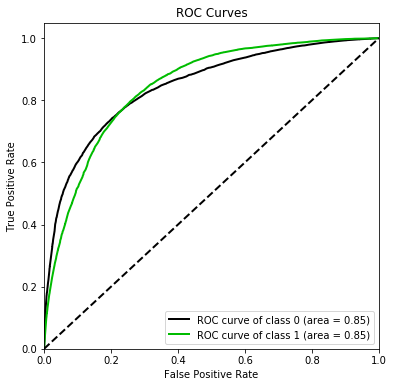

In [123]:
import scikitplot as skplt 
vali_proba_df =  pd.DataFrame(lr.predict_proba(vali_x))
skplt.metrics.plot_roc(vali_y,vali_proba_df,
                       plot_micro= False,figsize= (6,6),
                       
                       plot_macro = False)

In [115]:

b = 20/np.log(2)
a = 600+b*np.log(1/60)
base_score = a - b*lr.intercept_

In [122]:
file1 = '/Users/matlida/Downloads/score1.csv'
with open (file,'w') as fdata:
    fdata.write('base_score,{}\n'.format(base_score))
for i,col in enumerate(x.columns):
    score = woeall[col]*(-b*lr.coef_[0][i])
    score_name = 'score'
    score.index.name = col 
    #score.to_excel(file1,header=True) 
    score.to_csv(file1,header=True,mode = 'a')    

## test 

In [ ]:
def monotone_badrate(regroup,shape='mono',u=False):
    regroup=regroup.sort_index(ascending=True)
    badrate=list(regroup.badrate)
    cnt=len(badrate)
    if cnt<=1:print('%s组无所谓单调性'%cnt);return True
    #单调，计算：up=True不严格单调增，down=True不严格单调减；
    up=all([badrate[i] <= badrate[i+1] for i in range(cnt-1)])
    down=all([badrate[i] >= badrate[i+1] for i in range(cnt-1)])
    #期望单调性与实际单调性相符则mono_return=True，否则mono_return=False
    if shape=='mono_up':mono_return=up
    elif shape=='mono_down':mono_return=down
    else:mono_return=any([up,down])
    ###########################################################################
    #已判断为非单调，但允许U形，则进一步判断是否U形
    if mono_return==False and u!=False:
        #bool_strict=False，表示存在至少一对相邻数值相等，则这组数值即便成U形，但不会严格。
        bool_strict=1-any([badrate[i]==badrate[i+1] for i in range(cnt-1)])
        if bool_strict==False:return mono_return
        id_min=badrate.index(min(badrate));id_max=badrate.index(max(badrate))
        #倒U形：极大值索引id_max不在首或尾，且id_max左边单调增，右边单调减
        if id_max not in [0,cnt-1]:
            up_left=[badrate[i]<=badrate[i+1] for i in range(id_max)]
            down_right=[badrate[i]>=badrate[i+1] for i in range(id_max,cnt-1)]
            U_down=all(up_left+down_right)
        #不构成倒U形：极大值索引在首或尾
        else:U_down=False
        #正U形：极小值索引id_min不在首或尾，且id_min左边单调减，右边单调增
        if id_min not in [0,cnt-1]:
            down_left=[badrate[i]>=badrate[i+1] for i in range(id_min)]
            up_right=[badrate[i]<=badrate[i+1] for i in range(id_min,cnt-1)]
            U_up=all(down_left+up_right)
        #不构成正U形：极小值索引在首或尾
        else:U_up=False
        #期望单调性与实际单调性相符则True，否则False
        if u=='u_up':mono_return=U_up
        elif u=='u_down':mono_return=U_down
        else:mono_return=any([U_up,U_down])
    return mono_return



In [ ]:
def bin_badrate(df,var,label):
    total=df.groupby(var)[label].count()
    bad=df.groupby(var)[label].sum()
    regroup=pd.DataFrame({'total':total,'bad':bad})
    regroup['badrate']=regroup.apply(lambda x:x.bad/x.total,axis=1)
    return regroup

In [ ]:

aa = bin_badrate(data,'cut','SeriousDlqin2yrs')
ab = aa.badrate.to_dict()
ab

In [ ]:
monotone_badrate(aa,shape = 'mono',u = False)

In [ ]:
%who

In [ ]:
data['age'+'_br']=data['age'].map(ab)

In [ ]:
data.head()

In [ ]:
for var in data.columns:
        var_val_2bin={i:i for i in set(data[var])}#变量取值及其分箱规则初始化
        print(var)
        print(var_val_2bin)